In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn import metrics
from sklearn import feature_selection
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv("Interview.csv")

In [3]:
df.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.columns[-5:])
df[df.columns[-5:]].describe()
df.drop(df.columns[-5:],axis=1,inplace=True)

Index(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')


In [5]:
col_dic={"Date of Interview" : "doi",
"Client name" : "cl_nam",
"Industry" : "indus",
"Location" : "cl_loc",
"Position to be closed" : "pos",
"Nature of Skillset" : "skill",
"Interview Type" : "intrvw_typ",
"Name(Cand ID)" : "cand_nam",
"Gender" : "gend",
"Candidate Current Location" : "cand_cur_loc",
"Candidate Job Location" : "cand_j_loc",
"Interview Venue" : "intrvw_ven",
"Candidate Native location" : "cand_nat_loc",
"Have you obtained the necessary permission to start at the required time" : "enq_perm",
"Hope there will be no unscheduled meetings" : "enq_unsch_meet",
"Can I Call you three hours before the interview and follow up on your attendance for the interview" : "enq_call",
"Can I have an alternative number/ desk number. I assure you that I will not trouble you too much" : "enq_num",
"Have you taken a printout of your updated resume. Have you read the JD and understood the same" : "enq_resume",
"Are you clear with the venue details and the landmark." : "enq_ven",
"Has the call letter been shared" : "enq_call_letter",
"Expected Attendance" : "expc_at",
"Observed Attendance" : "obs_at",
"Marital Status" : "married"}

In [6]:
df.rename(columns=col_dic,inplace=True)

|Column|Renamed|
|---|---|
|Date of Interview|doi|
|Client name|cl_nam|
|Industry|indus|
|Location|cl_loc|
|Position to be closed|pos|
|Nature of Skillset|skill|
|Interview Type|intrvw_typ|
|Name(Cand ID)|cand_nam|
|Gender|gend|
|Candidate Current Location|cand_cur_loc|
|Candidate Job Location|cand_j_loc|
|Interview Venue|intrvw_ven|
|Candidate Native location|cand_nat_loc|
|Have you obtained the necessary permission to start at the required time|enq_perm|
|Hope there will be no unscheduled meetings|enq_unsch_meet|
|Can I Call you three hours before the interview and follow up on your attendance for the interview|enq_call|
|Can I have an alternative number/ desk number. I assure you that I will not trouble you too much|enq_num|
|Have you taken a printout of your updated resume. Have you read the JD and understood the same|enq_resume|
|Are you clear with the venue details and the landmark.|enq_ven|
|Has the call letter been shared|enq_call_letter|
|Expected Attendance|expc_at|
|Observed Attendance|obs_at|
|Marital Status|married|

---  
---  
### This section is for testing 

In [7]:
df1=df.copy()

In [8]:
#df_temp=df1.copy()
#df1=df_temp.copy()

In [9]:
# for col in df.columns[1:]:
#     print(df_temp[col].value_counts())
#     print("================================================")

---  
---  
## Client Name :  

In [10]:
df1.cl_nam.value_counts()

Standard Chartered Bank            904
Pfizer                              75
Hospira                             75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Prodapt                             17
Standard Chartered Bank Chennai     17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
﻿﻿                                   1
Woori Bank                           1
Name: cl_nam, dtype: int64

In [11]:
l1=[
    "Standard Chartered Bank Chennai",
    "Hewitt",
    "Aon hewitt Gurgaon"
]

l2=[
    "standard chartered bank",
    "aon hewitt",
    "aon hewitt",
]

In [12]:
df1.cl_nam.replace(l1,l2,inplace=True)
df1.cl_nam=df1.cl_nam.str.lower()
df1.cl_nam.value_counts()

standard chartered bank    921
pfizer                      75
hospira                     75
aon hewitt                  50
flextronics                 23
anz                         22
ust                         18
prodapt                     17
astrazeneca                 15
williams lea                11
barclays                     5
woori bank                   1
﻿﻿                           1
Name: cl_nam, dtype: int64

In [13]:
df_temp=df1.copy()

---  
---  
## Industry :

In [14]:
df1.indus.value_counts()

BFSI                        949
Pharmaceuticals             165
IT Products and Services     45
IT Services                  23
Electronics                  23
Telecom                      17
IT                           11
Name: indus, dtype: int64

In [15]:
df1.indus.replace(["IT Products and Services","IT Services"],["IT","IT"],inplace=True)
df1.indus=df1.indus.str.lower()
print(df1.indus.value_counts())

bfsi               949
pharmaceuticals    165
it                  79
electronics         23
telecom             17
Name: indus, dtype: int64


In [16]:
df_temp=df1.copy()

---  
---  
## Client Location:  

In [17]:
print(df1.cl_loc.value_counts())

Chennai       754
Bangalore     292
chennai        86
Hyderabad      38
Gurgaon        33
Noida          15
- Cochin-       9
chennai         3
Delhi           1
Gurgaonr        1
CHENNAI         1
Name: cl_loc, dtype: int64


In [18]:
df1.cl_loc=df1.cl_loc.str.lower().str.strip()
df1.cl_loc.replace(["gurgaonr","- cochin-"],["gurgaon","cochin"],inplace=True)
print(df1.cl_loc.value_counts())

chennai      844
bangalore    292
hyderabad     38
gurgaon       34
noida         15
cochin         9
delhi          1
Name: cl_loc, dtype: int64


In [19]:
df_temp=df1.copy()

---  
---  
## Position to be closed:

In [20]:
print(df1.pos.value_counts())

Routine                1023
Niche                   163
Dot Net                  18
Trade Finance            11
AML                       8
Selenium testing          5
Production- Sterile       5
Name: pos, dtype: int64


In [21]:
df1.pos=df1.pos.str.lower()
print(df1.pos.value_counts())

routine                1023
niche                   163
dot net                  18
trade finance            11
aml                       8
selenium testing          5
production- sterile       5
Name: pos, dtype: int64


---  
---  
## Nature of skill set:  
too many weird values. Will look at it later

In [22]:
print(df1.skill.value_counts()[:5])

JAVA/J2EE/Struts/Hibernate    220
Accounting Operations          86
Fresher                        86
AML/KYC/CDD                    84
CDD KYC                        52
Name: skill, dtype: int64


---  
---  
## Interview type:

In [23]:
df1.intrvw_typ.value_counts()

Scheduled Walk In    456
Scheduled            371
Scheduled Walkin     189
Walkin               189
Walkin                27
Sceduled walkin        1
Name: intrvw_typ, dtype: int64

In [24]:
df1.intrvw_typ=df1.intrvw_typ.str.lower().str.strip()
df1.intrvw_typ.replace(["scheduled walk in","sceduled walkin"],["scheduled walkin","scheduled walkin"],inplace=True)
df1.intrvw_typ.value_counts()

scheduled walkin    646
scheduled           371
walkin              216
Name: intrvw_typ, dtype: int64

In [25]:
df_temp=df1.copy()

---  
---  
## Name(Cand ID):  

---  
---  
## Gender:

In [26]:
df1.gend=df1.gend.str.lower().str.strip()

---  
---  
## Candidate current location:

In [27]:
df1.cand_cur_loc.value_counts()

Chennai       754
Bangalore     292
chennai        86
Hyderabad      38
Gurgaon        34
Noida          15
- Cochin-       9
chennai         3
Delhi           1
CHENNAI         1
Name: cand_cur_loc, dtype: int64

In [28]:
df1.cand_cur_loc=df1.cand_cur_loc.str.lower().str.strip()
df1.cand_cur_loc.replace(["- cochin-"],["cochin"],inplace=True)
print(df1.cand_cur_loc.value_counts())

chennai      844
bangalore    292
hyderabad     38
gurgaon       34
noida         15
cochin         9
delhi          1
Name: cand_cur_loc, dtype: int64


In [29]:
df_temp=df1.copy()

---  
---  
## Candidate Job locations:

In [30]:
df1.cand_j_loc.value_counts()

Chennai          893
Bangalore        259
Gurgaon           35
Visakapatinam     21
Noida             15
- Cochin-          9
Hosur              1
Name: cand_j_loc, dtype: int64

In [31]:
df1.cand_j_loc=df1.cand_cur_loc.str.lower().str.strip()
df1.cand_j_loc.replace(["- cochin-"],["cochin"],inplace=True)
print(df1.cand_j_loc.value_counts())

chennai      844
bangalore    292
hyderabad     38
gurgaon       34
noida         15
cochin         9
delhi          1
Name: cand_j_loc, dtype: int64


In [32]:
df_temp=df1.copy()

---  
---  
## Interview venue:

In [33]:
df1.intrvw_ven.value_counts()

Chennai       852
Bangalore     277
Hyderabad      40
Gurgaon        35
Noida          15
- Cochin-       9
Hosur           5
Name: intrvw_ven, dtype: int64

In [34]:
df1.intrvw_ven=df1.intrvw_ven.str.lower().str.strip()
df1.intrvw_ven.replace(["- cochin-"],["cochin"],inplace=True)
print(df1.intrvw_ven.value_counts())

chennai      852
bangalore    277
hyderabad     40
gurgaon       35
noida         15
cochin         9
hosur          5
Name: intrvw_ven, dtype: int64


In [35]:
df_temp=df1.copy()

---  
---  
## Candidate native location:  
### dont know what to do with this

In [36]:
l1=df1.cand_nat_loc.str.lower().str.strip().value_counts().index.tolist()

---  
---  
## Have you obtained the necessary permission to start at the required time

In [37]:
df1.enq_perm.value_counts()

Yes               917
No                 79
Not yet            19
Na                  5
yes                 4
Yet to confirm      4
NO                  1
Name: enq_perm, dtype: int64

In [38]:
df1.enq_perm=df1.enq_perm.str.lower()
df1.enq_perm.replace(["not yet","na","yet to confirm"],["no","no","no"],inplace=True)
print(df1.enq_perm.value_counts())

yes    921
no     108
Name: enq_perm, dtype: int64


In [39]:
#df_temp=df1.copy
df1.enq_perm.isna().sum()

205

In [40]:
df1['enq_perm'].fillna("uncertain",inplace=True)
df1.drop(df.index[[1233]], inplace = True)

---  
---  
## Hope there will be no unscheduled meetings

In [41]:
df1.enq_unsch_meet.str.lower().value_counts()

yes         954
na           20
no            6
not sure      5
cant say      1
Name: enq_unsch_meet, dtype: int64

In [42]:
df1.enq_unsch_meet=df1.enq_unsch_meet.str.lower()
df1.enq_unsch_meet.replace(["na","cant say","not sure"],["no","uncertain","uncertain"],inplace=True)
df1.enq_unsch_meet.value_counts()

yes          954
no            26
uncertain      6
Name: enq_unsch_meet, dtype: int64

In [43]:
df1.enq_unsch_meet.isna().sum()

247

In [44]:
df1.enq_unsch_meet.fillna("uncertain",inplace=True)

In [45]:
df_temp=df1.copy()

---  
---  
## Can I Call you three hours before the interview and follow up on your attendance for the interview

In [46]:
df1.enq_call.value_counts()

Yes        951
Na          20
No          10
yes          4
No Dont      1
Name: enq_call, dtype: int64

In [47]:
df1.enq_call=df1.enq_call.str.lower()
df1.enq_call.replace(["na","no dont"],["no","no"],inplace=True)
df1.enq_call.value_counts()

yes    955
no      31
Name: enq_call, dtype: int64

In [48]:
df1.enq_call.fillna("uncertain",inplace=True)

In [49]:
df_temp=df1.copy()

---  
---  
## Can I have an alternative number/ desk number. I assure you that I will not trouble you too much

In [50]:
df1.enq_num.value_counts()

Yes                          936
No                            27
Na                            19
No I have only thi number      2
na                             1
yes                            1
Name: enq_num, dtype: int64

In [51]:
df1.enq_num=df1.enq_num.str.lower()
df1.enq_num.replace(["na","no i have only thi number"],["no","no"],inplace=True)
print(df1.enq_num.value_counts())

yes    937
no      49
Name: enq_num, dtype: int64


In [52]:
df1.enq_num.fillna("uncertain",inplace=True)

---  
---  
## Have you taken a printout of your updated resume. Have you read the JD and understood the same

In [53]:
df1.enq_resume.value_counts()

Yes                      940
Na                        19
No                        16
Not Yet                    4
Not yet                    2
yes                        2
na                         1
No- will take it soon      1
Name: enq_resume, dtype: int64

In [54]:
df1.enq_resume=df1.enq_resume.str.lower()
df1.enq_resume.replace(["na","not yet","no- will take it soon"],["no","no","no"],inplace=True)
df1.enq_resume.value_counts()

yes    942
no      43
Name: enq_resume, dtype: int64

In [55]:
df1.enq_resume.fillna("uncertain",inplace=True)

In [56]:
df_temp=df1.copy()

---  
---  
## Are you clear with the venue details and the landmark.

In [57]:
df1.enq_ven.value_counts()

Yes                    946
Na                      19
No                      14
No- I need to check      2
yes                      2
na                       1
no                       1
Name: enq_ven, dtype: int64

In [58]:
df1.enq_ven=df1.enq_ven.str.lower()
df1.enq_ven.replace(["na","no- i need to check"],["no","no"],inplace=True)
print(df1.enq_ven.value_counts())

yes    948
no      37
Name: enq_ven, dtype: int64


In [59]:
df1.enq_ven.fillna("uncertain",inplace=True)

In [60]:
df_temp=df1.copy()

---  
---  
## Has the call letter been shared

In [61]:
df1.enq_call_letter.value_counts()

Yes               932
Na                 19
No                 17
Not Sure            8
Need To Check       3
Not yet             2
yes                 2
Not sure            1
Yet to Check        1
na                  1
no                  1
Havent Checked      1
Name: enq_call_letter, dtype: int64

In [62]:
df1.enq_call_letter=df1.enq_call_letter.str.lower()
df1.enq_call_letter.replace(["na","not yet","not sure","havent checked","yet to check","need to check"],["no","no","uncertain","uncertain","uncertain","uncertain"],inplace=True)
print(df1.enq_call_letter.value_counts())

yes          934
no            40
uncertain     14
Name: enq_call_letter, dtype: int64


In [63]:
df1.enq_call_letter.fillna("uncertain",inplace=True)
df1.enq_call_letter.value_counts()

yes          934
uncertain    259
no            40
Name: enq_call_letter, dtype: int64

In [64]:
df_temp=df1.copy()

---  
---  
## Expected Attendance

In [65]:
df1.expc_at.value_counts()

Yes          882
Uncertain    250
No            59
NO            34
11:00 AM       1
10.30 Am       1
yes            1
Name: expc_at, dtype: int64

In [66]:
df1.expc_at=df1.expc_at.str.lower()
df1.expc_at.replace(["11:00 am","10.30 am"],["yes","yes"],inplace=True)
print(df1.expc_at.value_counts())

yes          885
uncertain    250
no            93
Name: expc_at, dtype: int64


In [67]:
df1.expc_at.fillna("uncertain",inplace=True)

In [68]:
df_temp=df1.copy()

---  
---  
## Observed Attendance

In [69]:
df1.obs_at.value_counts()

Yes     701
No      401
yes      81
NO       35
no        7
No        6
yes       1
no        1
Name: obs_at, dtype: int64

In [70]:
df1.obs_at=df1.obs_at.str.lower().str.strip()
print(df1.obs_at.value_counts())

yes    783
no     450
Name: obs_at, dtype: int64


In [71]:
df_temp=df1.copy()

---  
---  
## Marital Status

In [72]:
df1.married.value_counts()

Single     767
Married    466
Name: married, dtype: int64

In [73]:
df1.married=df1.married.str.lower()
print(df1.married.value_counts())

single     767
married    466
Name: married, dtype: int64


In [74]:
df_temp=df1.copy()

---  
---  
## DATE OF INTERVIEW

In [75]:
#This is used to format the dates 
def clean_date(date):
    date = date.str.strip()
    date = date.str.split("&").str[0]
    date = date.str.replace('–', '/')
    date = date.str.replace('.', '/')
    date = date.str.replace('Apr', '04')
    date = date.str.replace('-', '/')
    date = date.str.replace(' ', '/')
    date = date.str.replace('//+', '/')
    return date

# modeling_df = modeling_df[modeling_df['date'] < '2018-01-01'] 

In [76]:
df1['doi'] = clean_date(df1['doi'])

In [77]:
type(df1.doi[0])

str

In [78]:
#To make all the values in the same format of date time to get the day of interview and the month of interview
df1['year'] = df1['doi'].str.split("/").str[2]
df1['day'] = df1['doi'].str.split("/").str[0]
df1['month'] = df1['doi'].str.split("/").str[1]
df1['year'].replace(['16', '15'], ['2016', '2015'], inplace = True)
df1['date'] = pd.to_datetime(pd.DataFrame({'year': df1['year'],
                                            'month': df1['month'],
                                            'day': df1['day']}), format = '%Y-%m-%d')
df1.drop(['year', 'month', 'day'], axis = 1, inplace = True)

In [79]:
dt=df1['date']

In [80]:
ls=[]
for i in range(len(dt)):
    ls.append(dt[i].month)
df1['month']=ls

In [81]:
ls=[]
for i in range(len(dt)):
    ls.append(dt[i].weekday()+1)
df1['day']=ls

In [82]:
df1.drop(columns=['doi','date','skill'],axis=1,inplace=True)

In [83]:
df_temp=df1.copy()

In [84]:
for col in df1.columns:
    print(col," ",df1[col].isna().sum())

cl_nam   0
indus   0
cl_loc   0
pos   0
intrvw_typ   0
cand_nam   0
gend   0
cand_cur_loc   0
cand_j_loc   0
intrvw_ven   0
cand_nat_loc   0
enq_perm   0
enq_unsch_meet   0
enq_call   0
enq_num   0
enq_resume   0
enq_ven   0
enq_call_letter   0
expc_at   0
obs_at   0
married   0
month   0
day   0


In [85]:
df_temp=df1.copy()

---  
---  
# Cleaned:

In [86]:
df1 = shuffle(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 587 to 1127
Data columns (total 23 columns):
cl_nam             1233 non-null object
indus              1233 non-null object
cl_loc             1233 non-null object
pos                1233 non-null object
intrvw_typ         1233 non-null object
cand_nam           1233 non-null object
gend               1233 non-null object
cand_cur_loc       1233 non-null object
cand_j_loc         1233 non-null object
intrvw_ven         1233 non-null object
cand_nat_loc       1233 non-null object
enq_perm           1233 non-null object
enq_unsch_meet     1233 non-null object
enq_call           1233 non-null object
enq_num            1233 non-null object
enq_resume         1233 non-null object
enq_ven            1233 non-null object
enq_call_letter    1233 non-null object
expc_at            1233 non-null object
obs_at             1233 non-null object
married            1233 non-null object
month              1233 non-null int64
day         

In [87]:
df1.head()

,cl_nam,indus,cl_loc,pos,intrvw_typ,cand_nam,gend,cand_cur_loc,cand_j_loc,intrvw_ven,...,enq_call,enq_num,enq_resume,enq_ven,enq_call_letter,expc_at,obs_at,married,month,day
587,flextronics,electronics,chennai,routine,scheduled,Candidate 588,male,chennai,chennai,chennai,...,uncertain,uncertain,uncertain,uncertain,uncertain,uncertain,no,married,12,3
180,standard chartered bank,bfsi,bangalore,routine,walkin,Candidate 181,female,bangalore,bangalore,bangalore,...,yes,yes,yes,yes,yes,yes,yes,single,12,7
900,hospira,pharmaceuticals,chennai,routine,walkin,Candidate 901,male,chennai,chennai,chennai,...,yes,yes,yes,yes,yes,yes,yes,married,4,5
598,flextronics,electronics,chennai,routine,scheduled,Candidate 599,female,chennai,chennai,chennai,...,uncertain,uncertain,uncertain,uncertain,uncertain,uncertain,no,married,12,3
1108,standard chartered bank,bfsi,chennai,routine,scheduled walkin,Candidate 1109,male,chennai,chennai,chennai,...,yes,yes,yes,yes,yes,yes,no,single,2,6


In [88]:
df1.drop('cand_nam',axis=1,inplace=True)

In [89]:
df2=df1.copy()
def t(col):
    j=1
    dic={}
    for i in df2[col].value_counts().index:
        dic[i]=j
        j+=1
    df2[col].replace(dic,inplace=True)

In [90]:
for col in df2.columns:
    if(col=='month' or col=='day'):
        continue
    t(col)

In [91]:
ohel = df2.drop(['obs_at','expc_at'],axis=1).columns.tolist()
df3 = pd.get_dummies(df2, prefix=ohel, columns=ohel)

--- 
---  

## Feature Selection

In [92]:
df3.columns.value_counts().sum()

145

In [93]:
X = df3.drop(['obs_at','expc_at'],axis=1)
y = df3['obs_at']

In [94]:
thresholder = VarianceThreshold(threshold=.18)

In [95]:
X_high_variance = thresholder.fit_transform(X)

In [96]:
temp = X.columns[thresholder.get_support()]

In [97]:
pd.get_option('display.max_columns')
pd.set_option('display.max_rows',1234)
df2

,cl_nam,indus,cl_loc,pos,intrvw_typ,gend,cand_cur_loc,cand_j_loc,intrvw_ven,cand_nat_loc,...,enq_call,enq_num,enq_resume,enq_ven,enq_call_letter,expc_at,obs_at,married,month,day
587,5,4,1,1,2,1,1,1,1,2,...,2,2,2,2,2,2,2,2,12,3
180,1,1,2,1,3,2,2,2,2,3,...,1,1,1,1,1,1,1,1,12,7
900,3,2,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,2,4,5
598,5,4,1,1,2,2,1,1,1,1,...,2,2,2,2,2,2,2,2,12,3
1108,1,1,1,1,1,1,1,1,1,9,...,1,1,1,1,1,1,2,1,2,6
472,1,1,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,2,2,11,6
1089,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,6
41,1,1,1,4,1,2,1,1,1,42,...,1,1,1,1,1,1,1,1,6,1
847,1,1,1,1,2,1,1,1,1,1,...,2,2,2,2,2,2,1,1,6,5
936,8,5,1,1,2,1,1,1,1,1,...,3,3,3,3,3,3,2,2,3,5


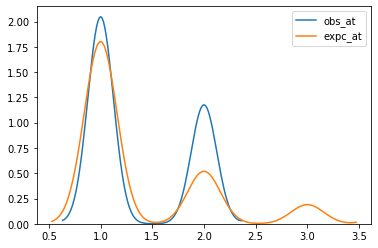

In [98]:
#sns.lmplot('cl_nam','obs_at', data=df2, fit_reg=False)
sns.kdeplot(df2['obs_at'])
sns.kdeplot(df2['expc_at'])

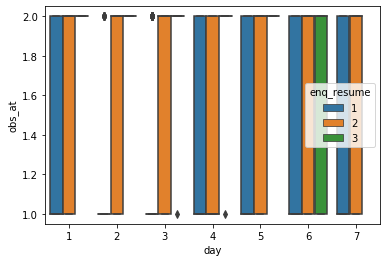

In [99]:
sns.boxplot(x='day', y='obs_at', data=df2,hue='enq_resume')

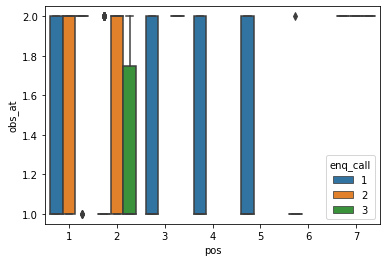

In [100]:
sns.boxplot(x='pos', y='obs_at', data=df2,hue='enq_call')

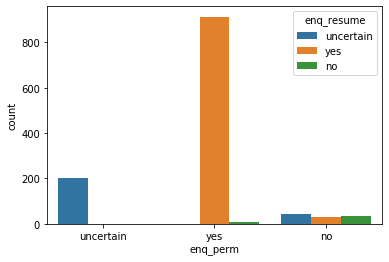

In [101]:
#sns.countplot(x='enq_resume',data=df2)
#sns.countplot(x='enq_perm',data=df2)
sns.countplot(x='enq_perm',data=df1,hue='enq_resume')

In [102]:
df2[(df2.enq_resume == 3) & (df2.day == 6)]['obs_at'].value_counts()

2    5
1    4
Name: obs_at, dtype: int64

In [103]:
#feature_scores = feature_selection.mutual_info_classif(X, y)

In [104]:
# micc = []
# for score, fname in sorted(zip(feature_scores, X), reverse=True)[:8]:
#     micc += [fname]
# micc

In [105]:
X = X[temp.tolist()] 

--- 
---  
## Function common to all models

In [106]:
def printresult(actual,predicted):
    confmatrix=metrics.confusion_matrix(actual,predicted)
    accscore=metrics.accuracy_score(actual,predicted)
    precscore=metrics.precision_score(actual,predicted)
    recscore=metrics.recall_score(actual,predicted)
    print(confmatrix)
    print("accuracy : {:.4f}".format(accscore))
    print("precision : {:.4f}".format(precscore))
    print("recall : {:.4f}".format(recscore))
    print("f1-score : {:.4f}".format(metrics.f1_score(actual,predicted)))
    print("AUC : {:.4f}".format(metrics.roc_auc_score(actual,predicted)))

--- 
---  
## Logistic Regression

In [107]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.15,random_state=210)
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
predict_test=model.predict(Xtest)
printresult(ytest,predict_test)

[[102  16]
 [ 40  27]]
accuracy : 0.6973
precision : 0.7183
recall : 0.8644
f1-score : 0.7846
AUC : 0.6337


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
model=0
model=linear_model.LogisticRegression()
modelcvscore=model_selection.cross_val_score(model,X,y,cv=5,scoring='precision')
modelcvscore

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

array([0.67357513, 0.72486772, 0.71356784, 0.70744681, 0.75555556])

In [109]:
modelcvscore.mean()

0.7150026115327155

--- 
---  
## Naive Bayes

In [110]:
model=naive_bayes.BernoulliNB()
model.fit(Xtrain,ytrain)
predict_test=model.predict(Xtest)
printresult(ytest,predict_test)

[[96 22]
 [42 25]]
accuracy : 0.6541
precision : 0.6957
recall : 0.8136
f1-score : 0.7500
AUC : 0.5933


--- 
---  
## Random Forest

In [111]:
# x=df3.drop(["obs_at","expc_at"],axis=1)
# y=df3.obs_at
# Xtrain,xtest,Ytrain,ytest=model_selection.train_test_split(x,y,test_size=.3,random_state=2)
# model=ensemble.RandomForestClassifier(n_estimators=100)
# model.fit(Xtrain,Ytrain)
# predicted=model.predict(xtest)
# printresult(predicted,ytest)
# ## -----
# feat_imp=pd.DataFrame({"imp":model.feature_importances_})
# feat_imp["feat"]=Xtrain.columns
# feat_imp.sort_values(by="imp",ascending=False,inplace=True)
# feat_imp.set_index("feat",inplace=True)
# feat_imp.plot.barh(figsize=(8,8))

In [112]:
# x=df3.drop("obs_at",axis=1)
# y=df3.obs_at
# Xtrain,xtest,Ytrain,ytest=model_selection.train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
# model=ensemble.RandomForestClassifier(n_estimators=100)
# model.fit(Xtrain,Ytrain)
# predicted=model.predict(xtest)
# printresult(predicted,ytest)
# ## -----
# feat_imp=pd.DataFrame({"imp":model.feature_importances_})
# feat_imp["feat"]=Xtrain.columns
# feat_imp.sort_values(by="imp",ascending=False,inplace=True)
# feat_imp.set_index("feat",inplace=True)
# feat_imp.plot.barh(figsize=(8,8))

## CROSS VALIDATION 


In [113]:
# for score in ["accuracy", "precision", "recall"]:
x=df2.drop("obs_at",axis=1)
y=df2.obs_at

print("before ohe")
model_rfc=ensemble.RandomForestClassifier(n_estimators=100)
for score in ["accuracy", "precision", "recall","f1"]:#ROC_AUC not present
    scores=model_selection.cross_val_score(model_rfc,x,y,cv=5,scoring=score)   
    print(score,scores,scores.mean())




x=df3.drop("obs_at",axis=1)
y=df3.obs_at

print("\nafter ohe")
model_rfc=ensemble.RandomForestClassifier(n_estimators=100)
for score in ["accuracy", "precision", "recall","f1"]: #ROC_AUC not present
    scores=model_selection.cross_val_score(model_rfc,x,y,cv=5,scoring=score)   
    print(score,scores,scores.mean()) 

before ohe
accuracy [0.65991903 0.65991903 0.66801619 0.65447154 0.59756098] 0.6479773542674698
precision [0.7        0.70718232 0.68947368 0.69662921 0.68421053] 0.6954991488902901
recall [0.84076433 0.82165605 0.84713376 0.78846154 0.74358974] 0.808321084435734
f1 [0.75218659 0.75581395 0.77192982 0.73939394 0.71826625] 0.7475181120469934

after ohe
accuracy [0.67206478 0.66396761 0.68016194 0.65853659 0.61382114] 0.6577104111122083
precision [0.68367347 0.70053476 0.70157068 0.71186441 0.67065868] 0.6936603997577415
recall [0.86624204 0.82802548 0.82802548 0.81410256 0.77564103] 0.8224073166748326
f1 [0.77966102 0.75581395 0.77492877 0.76276276 0.71515152] 0.7576636046561156


In [114]:
rfcev=feature_selection.RFECV(model,cv=5,scoring="precision")
#rfcev.fit(x,y)
x_new=rfcev.fit_transform(x,y)

In [115]:
print(x_new)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [116]:
len(x_new)

1233

In [117]:
# x=df2.drop("obs_at",axis=1)
# y=df2.obs_at
# #data = pd.read_csv("D://Blogs//train.csv")
# #X = data.iloc[:,0:20]  #independent columns
# #y = data.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(x,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(x.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(8,'Score'))  #print 10 best features

              Specs      Score
17          expc_at  58.032965
10         enq_perm  50.952692
16  enq_call_letter  24.395756
14       enq_resume  23.867266
13          enq_num  22.686281
15          enq_ven  20.275348
11   enq_unsch_meet  18.719412
12         enq_call  15.416396


In [118]:

# x=df3.drop("obs_at",axis=1)
# y=df3.obs_at
# #data = pd.read_csv("D://Blogs//train.csv")
# #X = data.iloc[:,0:20]  #independent columns
# #y = data.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(x,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(x.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(8,'Score'))  #print 10 best features

                 Specs       Score
106         enq_perm_3  127.912950
0              expc_at   58.032965
123  enq_call_letter_2   51.267031
108   enq_unsch_meet_2   50.960993
118       enq_resume_3   45.552318
111         enq_call_2   45.175754
114          enq_num_2   45.175754
117       enq_resume_2   44.350101


In [119]:
col1=["expc_at","enq_perm","enq_call_letter","enq_resume","enq_ven","enq_num","enq_unsch_meet","enq_call"]
col2=["enq_perm_3","expc_at","enq_call_letter_2","enq_unsch_meet_2","enq_resume_3","enq_call_2","enq_num_2","enq_resume_2"]

In [120]:
x=df2[col1]
y=df2.obs_at
print("before ohe")
model_rfc=ensemble.RandomForestClassifier(n_estimators=100)
for score in ["accuracy", "precision", "recall","f1"]: 
    scores=model_selection.cross_val_score(model_rfc,x,y,cv=5,scoring=score)   
    print(score,scores,scores.mean())
    
    
x=df3[col2]
y=df3.obs_at

print("\nafter ohe")
model_rfc=ensemble.RandomForestClassifier(n_estimators=100)
for score in ["accuracy", "precision", "recall","f1"]: #ROC_AUC not present
    scores=model_selection.cross_val_score(model_rfc,x,y,cv=5,scoring=score)   
    print(score,scores,scores.mean()) 

before ohe
accuracy [0.65182186 0.70850202 0.70850202 0.70325203 0.70731707] 0.6958790033244462
precision [0.68817204 0.68888889 0.6875     0.68609865 0.69266055] 0.6886640274133755
recall [0.82165605 0.99363057 0.98089172 0.8525641  0.96794872] 0.9233382328923729
f1 [0.75       0.81151832 0.80839895 0.80738786 0.80748663] 0.796958353710288

after ohe
accuracy [0.63562753 0.71255061 0.69635628 0.70325203 0.70731707] 0.6910207037293045
precision [0.67724868 0.68584071 0.68636364 0.72625698 0.69444444] 0.6940308898523166
recall [0.81528662 0.98726115 0.96178344 0.97435897 0.96153846] 0.9400457292177038
f1 [0.73988439 0.81462141 0.80106101 0.80533333 0.80645161] 0.7934703514358746


In [121]:
len(df3.columns)

145